# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
dataset = dataset.to_numpy()
x_train = dataset[:int(0.8*len(dataset)), 1]
y_train = dataset[:int(0.8*len(dataset)), 2]

x_test = dataset[int(0.8*len(dataset)):, 1]
y_test = dataset[int(0.8*len(dataset)):, 2]

x_train.shape = (len(x_train), 1)
y_train.shape = (len(y_train), 1)
x_test.shape = (len(x_test), 1)
y_test.shape = (len(x_test), 1)


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
One_vec = np.ones_like(x_train)
#print(x_train)
A = np.concatenate((x_train, One_vec), axis = 1)
m = np.linalg.inv(A.T @ A)@(A.T)@y_train

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(predicted_train_y, y_train)
test_error = mean_squared_error(predicted_test_y, y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.354495119213003


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

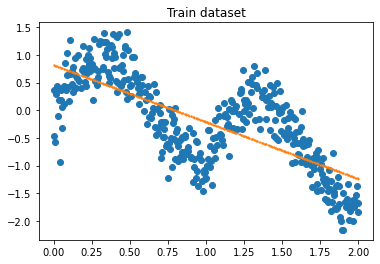

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

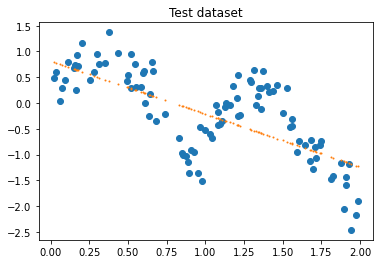

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

-write here- True model that has generated these data is actually far from linear and so we have high degree of error

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

-write here-yes, the locally weighted model actually use the neighboring samples for prediction which will be good

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    x = the_query_point
    tao = hyperparameter
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-1*(np.linalg.norm(xi - x)**2)/(2*(tao**2)))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    Mat = X.T@W@X
    Mat2 = (X.T)@W@train_Y
    #print(np.linalg.norm(W))
    theta = (np.linalg.inv(Mat))@Mat2
    #print(theta.shape, qx.shape, type(np.dot(qx, theta)))
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
hyperparameter = np.sqrt(0.001)
predicted_test = np.array([predict(x_train, y_train, query, hyperparameter) for query in x_test]).reshape((100, 1))
print(predicted_test.shape, y_test.shape)
error = mean_squared_error(predicted_test, y_test)
print(f"MSE test error: {error}")

#predict(x_train, y_train, x_test[-1], hyperparameter)

G:\Users\avajang\anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


(100, 1) (100, 1)
MSE test error: 0.09759638295902757


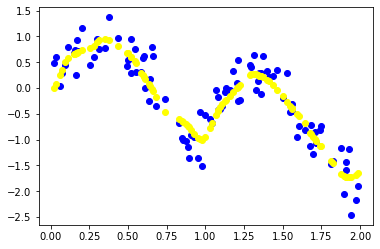

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

-write here-yes, the new model is adaptive and can track the true function roughly

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

-write here- Will be better than the linear model and its performance might be like the weighted model

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.abs(x1-x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        dist = self.distance(self.X, x)
        indices = np.argsort(dist, axis = 0)[0:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = np.array([model.predict(x) for x in x_test])
    error = mean_squared_error(predicted_y, y_test)
    return error, predicted_y

In [13]:
k = 4
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")


MSE error of KNN for test dataset: 0.09782237685625245


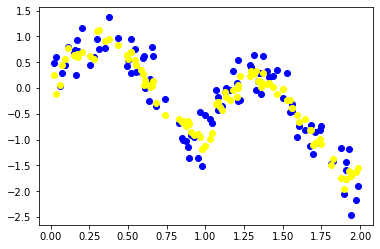

In [14]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

-write here-result of KNN is similar to the locally weighted model, although the variance of KNN is higher